# Importing libraries

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
%matplotlib inline

# Reading in file

A "pickle file is a serialization of a python object". When I read the pickle file, I get a character stream. Unlike a CSV, where I get a **comma-separated file**.

In [3]:
df = pd.read_pickle('all_banks')

# Basics
1. head to have a quick look at the data
2. info to get an idea of the dataset
3. columns to get column names

We can also move forward with shape, columns.tolist() 

Take note that we're dealing with a multi-indexed dataframe.

In [8]:
df.head(2)

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   

Bank Ticker           ...     MS                                 WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume  Open   High   
Date                  ...                                                     
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.6  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.8  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  

[2 rows x 30 columns]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 30 columns):
(BAC, Open)      2517 non-null float64
(BAC, High)      2517 non-null float64
(BAC, Low)       2517 non-null float64
(BAC, Close)     2517 non-null float64
(BAC, Volume)    2517 non-null int64
(C, Open)        2517 non-null float64
(C, High)        2517 non-null float64
(C, Low)         2517 non-null float64
(C, Close)       2517 non-null float64
(C, Volume)      2517 non-null int64
(GS, Open)       2517 non-null float64
(GS, High)       2517 non-null float64
(GS, Low)        2517 non-null float64
(GS, Close)      2517 non-null float64
(GS, Volume)     2517 non-null int64
(JPM, Open)      2517 non-null float64
(JPM, High)      2517 non-null float64
(JPM, Low)       2517 non-null float64
(JPM, Close)     2517 non-null float64
(JPM, Volume)    2517 non-null int64
(MS, Open)       2517 non-null float64
(MS, High)       2517 non-null float64
(MS, Low)        2517 non

In [10]:
df.columns

MultiIndex(levels=[['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'], ['Open', 'High', 'Low', 'Close', 'Volume']],
           codes=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]],
           names=['Bank Ticker', 'Stock Info'])

Due to the dataset being multi-leveled indexed, we will be using the .xs function frequently. 

In a nutshell, the .xs can be considered to be a simple filter function.

In [18]:
df.xs('BAC',axis=1).head(2)

Stock Info   Open   High    Low  Close    Volume
Date                                            
2006-01-03  46.92  47.18  46.15  47.08  16296700
2006-01-04  47.00  47.24  46.45  46.58  17757900

In [19]:
df.xs('Close', level = 1, axis=1).head(5)

Bank Ticker    BAC      C      GS    JPM     MS    WFC
Date                                                  
2006-01-03   47.08  492.9  128.87  40.19  58.31  31.90
2006-01-04   46.58  483.8  127.09  39.62  58.35  31.53
2006-01-05   46.64  486.2  127.04  39.74  58.51  31.50
2006-01-06   46.57  486.2  128.84  40.02  58.57  31.68
2006-01-09   46.60  483.9  130.39  40.67  59.19  31.68

Note how there are two dimensions at play, the bank ticker as well as the 'type' of price (eg. Open/Close)

Getting the maximum and minimum closing price of each company

In [20]:
df.xs('Close', level=1,axis=1).max()

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [21]:
df.xs('Close', level=1,axis=1).min()

Bank Ticker
BAC     3.14
C       4.52
GS     52.00
JPM    15.90
MS      9.20
WFC     8.12
dtype: float64

** Next, we create a new empty dataframe called returns. Returns is defined as follows:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$


Essentially (today's closing / yesterday's closing) - 1

To solve the problem
1. Create an empty dataframe
2. Generate a list of banks
3. Iterate across each bank name
4. Use .xs to get the closing price
5. Use .pct to get a bank's stock returns
6. Add to original dataframe

In [23]:
returns = pd.DataFrame()

In [24]:
list_of_banks = list(df.columns.levels[0])


In [25]:
for banks in list_of_banks:
    new_df = df.xs((banks, 'Close'), axis=1).pct_change()
    returns[banks] = new_df

In [26]:
returns.head()

BAC         C        GS       JPM        MS       WFC
Date                                                                  
2006-01-03       NaN       NaN       NaN       NaN       NaN       NaN
2006-01-04 -0.010620 -0.018462 -0.013812 -0.014183  0.000686 -0.011599
2006-01-05  0.001288  0.004961 -0.000393  0.003029  0.002742 -0.000951
2006-01-06 -0.001501  0.000000  0.014169  0.007046  0.001025  0.005714
2006-01-09  0.000644 -0.004731  0.012030  0.016242  0.010586  0.000000

### Exploration

Exploring the relations between the returns of the various companies.

A pairplot can be quite intensive and - gives a birds eye view of relationships between various variables

/Users/darrentheman/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/darrentheman/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


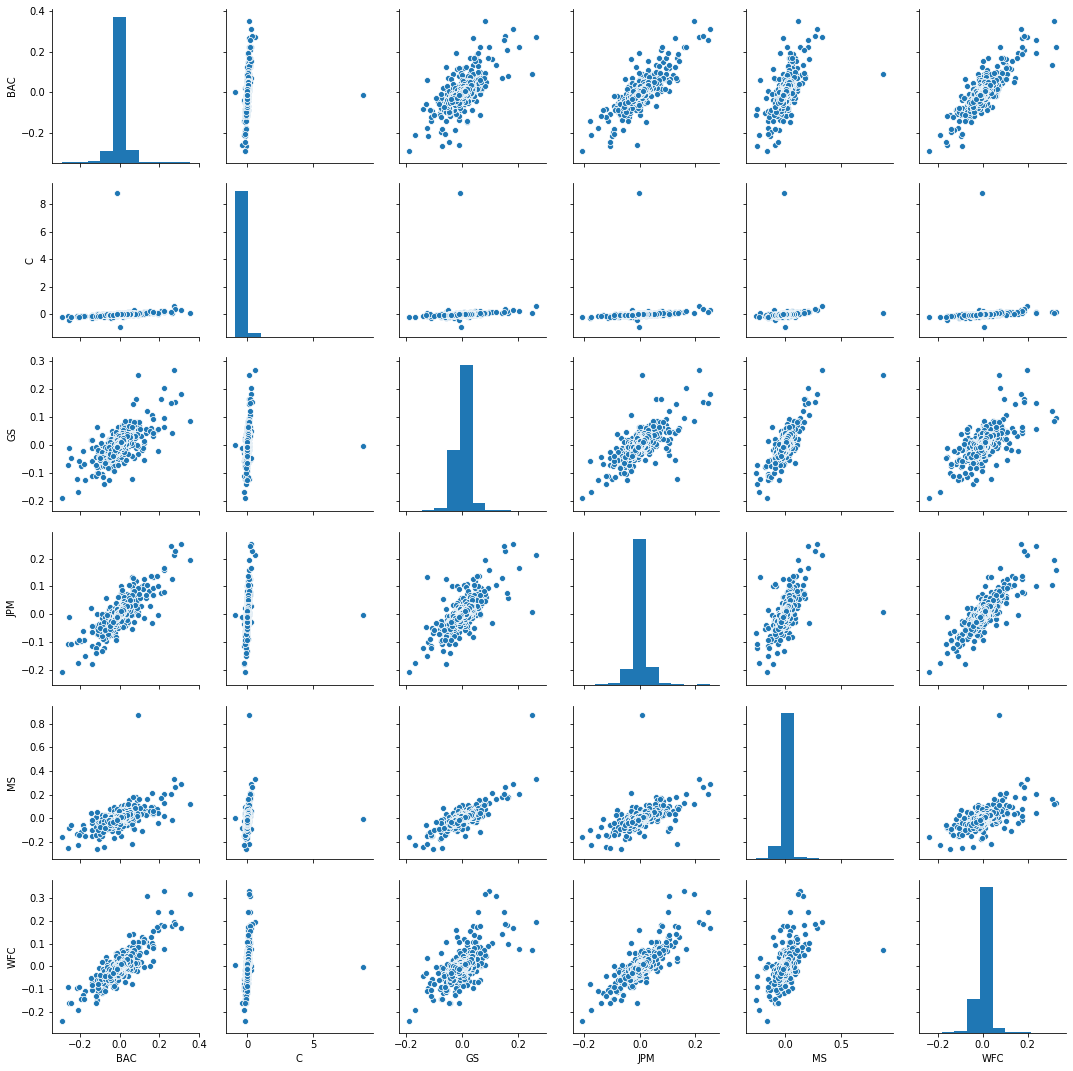

In [27]:
sns.pairplot(returns)

#### Finding

Citibank stands out as it is the only one with a vastly different relationship with the other stocks. 

I believe this is due to Citibank managing to get through the 2008 financial crisis more successfully compared to the others.

Furthermore, this was when the US Government acquired a large stock in Citi as a form of bailout. 

**Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**


https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmin.html

In [28]:
returns.idxmin()

BAC   2009-01-20
C     2011-05-06
GS    2009-01-20
JPM   2009-01-20
MS    2008-10-09
WFC   2009-01-20
dtype: datetime64[ns]

In [29]:
returns.idxmax()

BAC   2009-04-09
C     2011-05-09
GS    2008-11-24
JPM   2009-01-21
MS    2008-10-13
WFC   2008-07-16
dtype: datetime64[ns]

Citibank's largest drop and gain is very close, just 3 days apart. 

This was a result of a stock [split](https://www.citigroup.com/citi/news/2011/110321a.htm). 



What is a stock split?

A stock split refers to the event where a company issues **more** shares, increasing  the number of outstanding (available) shares. This is followed by a decrease in the stock price, making sure market capitalisation remains relatively constant.

- An example

Apple has 100 shares outstanding, each priced at $1. That is a market capitalisation of 100 (100 * 1)

Apple decides to have a stock split, causing each stock to be split into two. Apple now has 200 shares outstanding. Generally, price needs to fall to ensure that market capitalisation remains relatively constant. (At $100).


**Why would a company intiate a stock split and lower it's stock price?**

1. Making stock more accessible to investors (eg. Cheaper so more people can help to finance the company)
2. Increase liquidity, hence reduce the bid-sell spread and reducing the impact of people buying/selling on the stock price. 

**What are the effects of a stock split?**
1. General renewed interest in the stock. Reason being that a stock split is a sign that price has been rising steadily, therefore attracting new investors. 2
2. More people now have a chance to purchase the stock, therefore having demand drive price up. 

**Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

Standard Deviation, when applied to the annual rate of return of an investment, demonstrates the **historical volatility** of it.  The greater the standard deviation of securities, the greater the variance between each price and the mean, which shows a larger price range. For example, a volatile stock has a high standard deviation, while the deviation of a stable blue-chip stock is usually rather low.

In [31]:
returns.std()

BAC    0.036650
C      0.179969
GS     0.025346
JPM    0.027656
MS     0.037820
WFC    0.030233
dtype: float64

In [32]:
returns[returns.index.year == 2015].std()

BAC    0.016163
C      0.015289
GS     0.014046
JPM    0.014017
MS     0.016249
WFC    0.012591
dtype: float64

Riskiest would be
- BAC

Riskiest in 2015 would also be 
- MS

**Create a distplot using seaborn of the 2015 returns for Morgan Stanley**

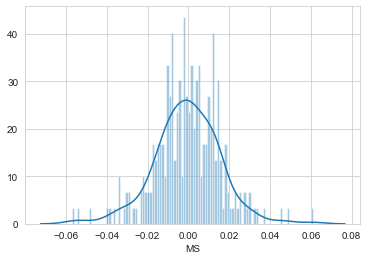

In [33]:
sns.set_style("whitegrid")


sns.distplot(returns[returns.index.year == 2015]['MS'], bins = 100)

**Create a distplot using seaborn of the 2008 returns for CitiGroup**

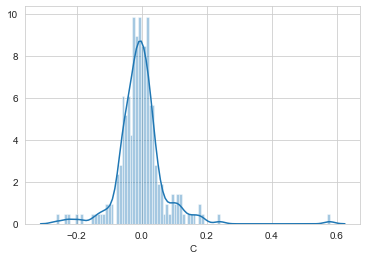

In [34]:
sns.distplot(returns[returns.index.year == 2008]["C"], bins = 100)

## Visualizations

Next up, our visualizations will be focused on time series plots. Generally, we are less concerned about the absolute value (aside from valueing a company) and more concerned with overall price movements. Depending on the type of trader you're, you would be concerned with different time horizons.

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

/Users/darrentheman/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



Text(0.5, 1.0, 'Close Price of companies')

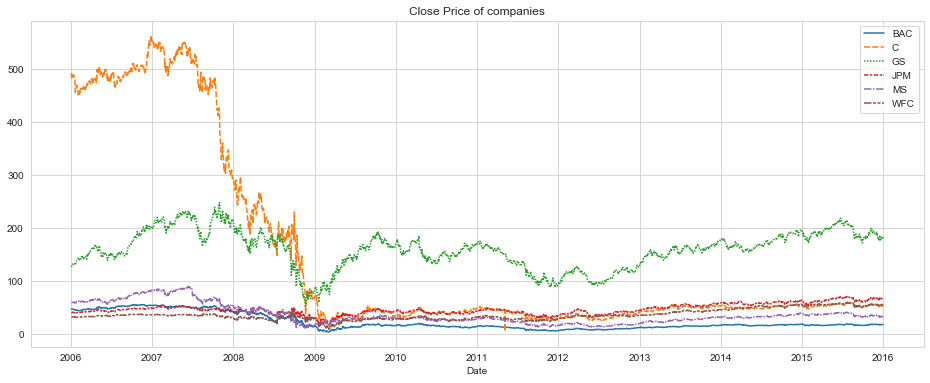

In [37]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(data=df.xs('Close', level=1, axis=1))

ax.set_title('Close Price of companies')

**Citibank**

From above, we see that early on 2006, Citibank was priced much higher compared to it's peers. From research done, it was once the biggest bank of America. Over, it is clear that it has been following a general declining trend since 2007. From this information, one could argue that the stock split in 2011 was a **reaction** to the declining stock price.  

### An interactive chart

In [39]:
df.xs('Close', level=1, axis=1).iplot()

### Moving Averages

MA is an indicator used to smooth out price action by filtering out the “noise” from random short-term price fluctuations. It is a trend-following, or lagging, indicator because it is based on past prices.

Next, we will be analyzing the moving averages for these stocks in the year 2008.

**Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

In [42]:
BAC_30day_AVG = df[df.index.year==2008]['BAC']['Close'].rolling(window=30).mean()

In [44]:
BAC_30day_AVG.iplot()

### Rolling

[Rolling](https://www.geeksforgeeks.org/python-pandas-series-rolling/) function is important when we are doing functions that require a combination of rows. 

For example, in the previous cell, we are using the rolloing function to get the mean of every 30 rows. 

In [45]:
BAC_Close = df[df.index.year == 2008]['BAC']['Close']

In [46]:
BAC = pd.DataFrame()

In [47]:
BAC['Close'] = BAC_Close.copy()

In [48]:
BAC['30 Day Avg'] = BAC_30day_AVG.copy()

Text(0, 0.5, 'Price')

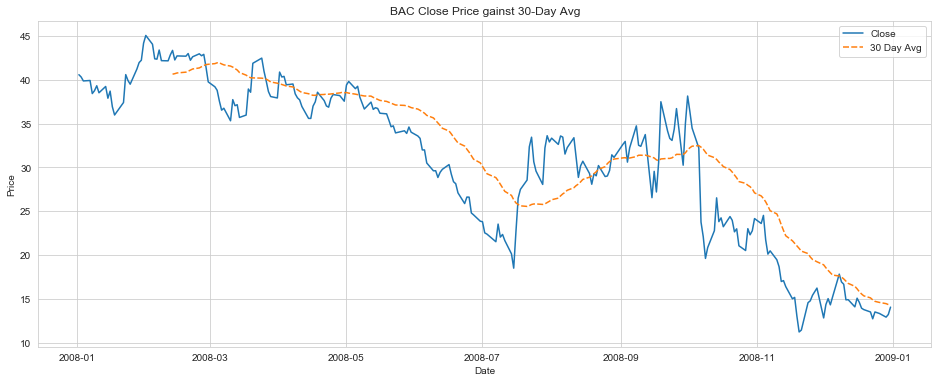

In [49]:
plt.figure(figsize=(16, 6))

ax = sns.lineplot(data=BAC)

ax.set_title('BAC Close Price gainst 30-Day Avg')
ax.set_xlabel('Date')
ax.set_ylabel('Price')

In [50]:
BAC.iplot()

**Create a heatmap of the correlation between the stocks Close Price.**

The heatmap below demonstrates the correlations between each column. below is a snippet of the df to refresh your memory. In essence, the heatmap allows one to identify relationships between variables and compare the strength of the relationships with other relationships.

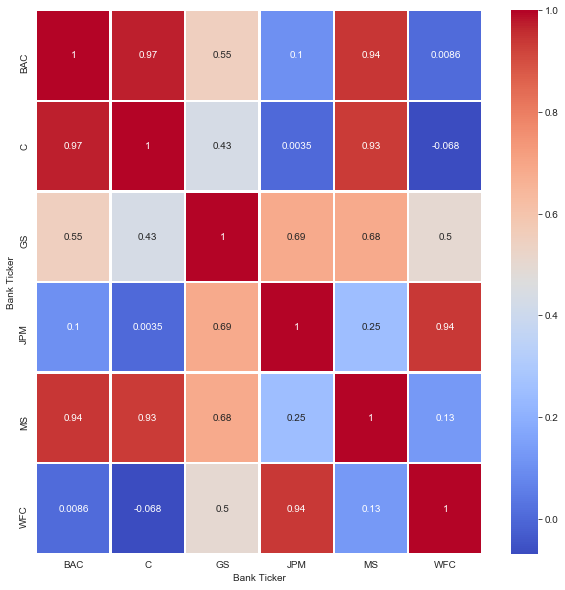

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(df.xs('Close', level=1, axis=1).corr(), annot=True, cmap='coolwarm', lw = 1.4)

**Optional: Use seaborn's clustermap to cluster the correlations together:**

**What's a clustermap?**

A clustermap basically clusters information together (ie. Rows and Columns). It is a diagram that shows the hierarchical relationship between objects. It is most commonly created as an output from hierarchical clustering. The main use of a dendrogram is to work out the best way to allocate objects to clusters.

In the following clustermap, on the left bottom, BAC and C are most similar. In this case, there vertical and horizontal clustering is the same.  

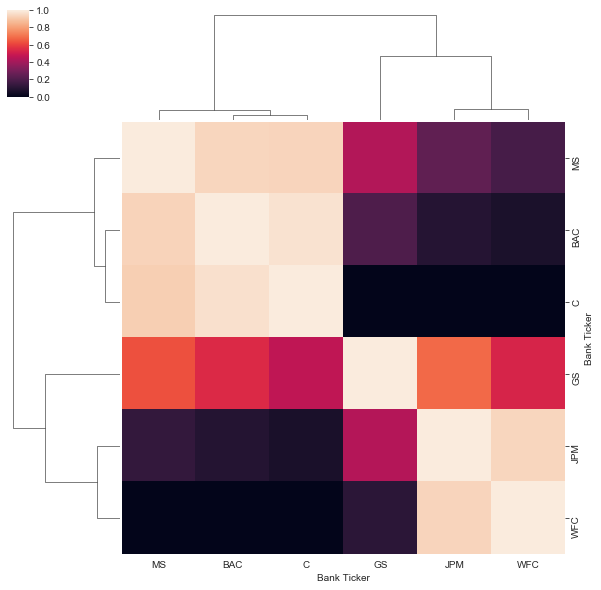

In [52]:
sns.clustermap(df.xs('Close', level=1, axis=1).corr(),standard_scale=1)

### More Visualizations

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. 

**Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

The candlestick's shadows show the day's high and low and how they compare to the open and close. A candlestick's shape varies based on the relationship between the day's high, low, opening and closing prices.

In [55]:
df['BAC'].iplot(kind='candle')

**Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

For more information about .ta_plot()

https://plot.ly/pandas/moving-average/

In [58]:
df['MS'].ta_plot(study='sma')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [59]:
df[df.index.year==2015]['BAC'].ta_plot(study='boll')